# Predictive Analytics : Sistem Rekomendasi Makanan
- Nauval Dwi Primadya

## Deksripsi Proyek

### Deskripsi dan Latar Belakang dari Proyek Prediksi Kualitas pada Buah Pisang dengan menggunakan Machine Learning

Proyek ini berfokus pada pengembangan model machine learning untuk memprediksi kualitas buah pisang secara lebih akurat dan efisien. Saat ini, penilaian kualitas pisang masih dilakukan secara manual, yang membutuhkan banyak waktu, tenaga, dan memiliki potensi kesalahan tinggi. Kondisi ini menyebabkan kerugian bagi petani dan distributor, serta seringkali mengecewakan konsumen. Model prediksi kualitas pisang ini diharapkan dapat menjadi solusi yang lebih akurat, efisien, dan transparan dalam mengatasi permasalahan tersebut.

# 1.  Melakukan Import Library yang digunakan

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import layers, regularizers

2024-11-17 01:17:56.948536: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 01:17:56.959331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731781076.971945   89093 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731781076.975833   89093 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 01:17:56.989167: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# 2. Data Understanding

merupakan tahapan untuk memahami informasi dari sebuah dataset dan digunakan untuk menentukan kualitas dari dataset tersebut. serta mendapatkan wawasan langkah apa saja yang akan diterapkan pada dataset tersebut.

## 2.1 Data Loading
Tahap *Data Loading* bertujuan untuk memuat dataset yang akan digunakan, sehingga mempermudah pemahaman terhadap data tersebut. Dataset ini telah melalui proses *pembersihan* dan *normalisasi* oleh penyusunnya, sehingga siap digunakan dan lebih mudah diakses, bahkan oleh pemula.

<br>

**Detail Dataset**

- **Title**: Kualitas Banana
- **Source**: [Kaggle](https://www.kaggle.com/datasets/l3llff/banana)
- **Visibility**: Public


## 2.2 Exploratory Data Analysis **(EDA)**

*Exploratory Data Analysis* adalah proses awal dalam menyelidiki data untuk memahami karakteristiknya, mengidentifikasi pola dan anomali, serta memverifikasi asumsi yang mungkin ada pada data tersebut. Metode ini umumnya memanfaatkan teknik statistik serta visualisasi grafis untuk menyajikan informasi dengan lebih jelas.

In [2]:
#Membaca dataset
data = pd.read_csv('/media/primadya/Kerja/dicoding/terapan/submission 2/dataset/food/1662574418893344.csv')
rating = pd.read_csv('/media/primadya/Kerja/dicoding/terapan/submission 2/dataset/food/ratings.csv')

In [3]:
# Ubah nama kolom menjadi lowercase
data.columns = data.columns.str.lower()
rating.columns = rating.columns.str.lower()


Kode tersebut digunakan untuk mengubah nama kolom dalam dua DataFrame (`data` dan `rating`) menjadi huruf kecil (lowercase). Perintah `data.columns.str.lower()` dan `rating.columns.str.lower()` mengakses nama kolom di masing-masing DataFrame dan mengubah semua karakter dalam nama kolom menjadi huruf kecil menggunakan metode string `.lower()` Setelah perubahan ini, nama kolom pada kedua DataFrame menjadi konsisten dalam format huruf kecil, yang dapat membantu menghindari kesalahan saat mengakses kolom dan memastikan keterbacaan serta konsistensi dalam pengolahan data.

### Deskripsi Variabel

In [4]:
#Menampilkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   food_id   400 non-null    int64 
 1   name      400 non-null    object
 2   c_type    400 non-null    object
 3   veg_non   400 non-null    object
 4   describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [5]:
#Menampilkan isi dari variabel data
data.head(10)

,food_id,name,c_type,veg_non,describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
5,6,japanese curry arancini with barley salsa,Japanese,veg,"japanese curry, sticky rice, cheese inside ric..."
6,7,chocolate nero cookies,Dessert,veg,"almonds, eggs, granulated sugar, bittersweet c..."
7,8,lamb and chargrilled bell pepper soup,Healthy Food,non-veg,"lamb bones (preferably shank and shoulder), on..."
8,9,cream of almond soup,Healthy Food,veg,"vegetable stock, skimmed milk, toasted almonds..."
9,10,broccoli and almond soup,Healthy Food,veg,"vegetable stock, broccoli, ground almonds (toa..."


Berikut adalah penjelasan fitur-fitur dalam tabel :

- **`food_id`**     : ID unik untuk setiap makanan, bertipe data (integer).
- **`name`**        : Nama hidangan makanan, bertipe data (string).
- **`c_type`**      : Kategori makanan (seperti "Healthy Food", "Snack", "Dessert", dll.). bertipe data (string).
- **`veg_non`**     : Menunjukkan apakah makanan tersebut vegetarian ("veg") atau non-vegetarian ("non-veg"), bertipe data (string).
- **`describe`**    : Deskripsi bahan-bahan yang digunakan dalam hidangan, bertipe data (string).

In [6]:
#Menampilkan info dari dataset
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  511 non-null    float64
 1   food_id  511 non-null    float64
 2   rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


In [7]:
#Menampilkan isi dari variabel data
rating.head(10)

,user_id,food_id,rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0
5,2.0,33.0,8.0
6,2.0,106.0,9.0
7,2.0,71.0,8.0
8,3.0,73.0,9.0
9,3.0,110.0,10.0


- **`user_id`**: ID unik untuk setiap pengguna yang memberikan rating (angka desimal, bisa menunjukkan pengguna yang berbeda).
- **`food_id`**: ID unik untuk makanan yang diberi rating, yang mengacu pada makanan tertentu dalam tabel lain (angka desimal).
- **`rating`**: Nilai rating yang diberikan oleh pengguna untuk makanan tersebut, biasanya dalam skala 1-10, di mana 10 menunjukkan penilaian terbaik (angka desimal).


### Visualisasi Data

Jumlah Type:  16
c_type
Indian          88
Healthy Food    58
Dessert         53
Chinese         27
Italian         25
Snack           23
Thai            23
French          22
Mexican         21
Japanese        18
Beverage        11
Nepalese        11
Korean           9
Vietnames        9
 Korean          1
Spanish          1
Name: count, dtype: int64


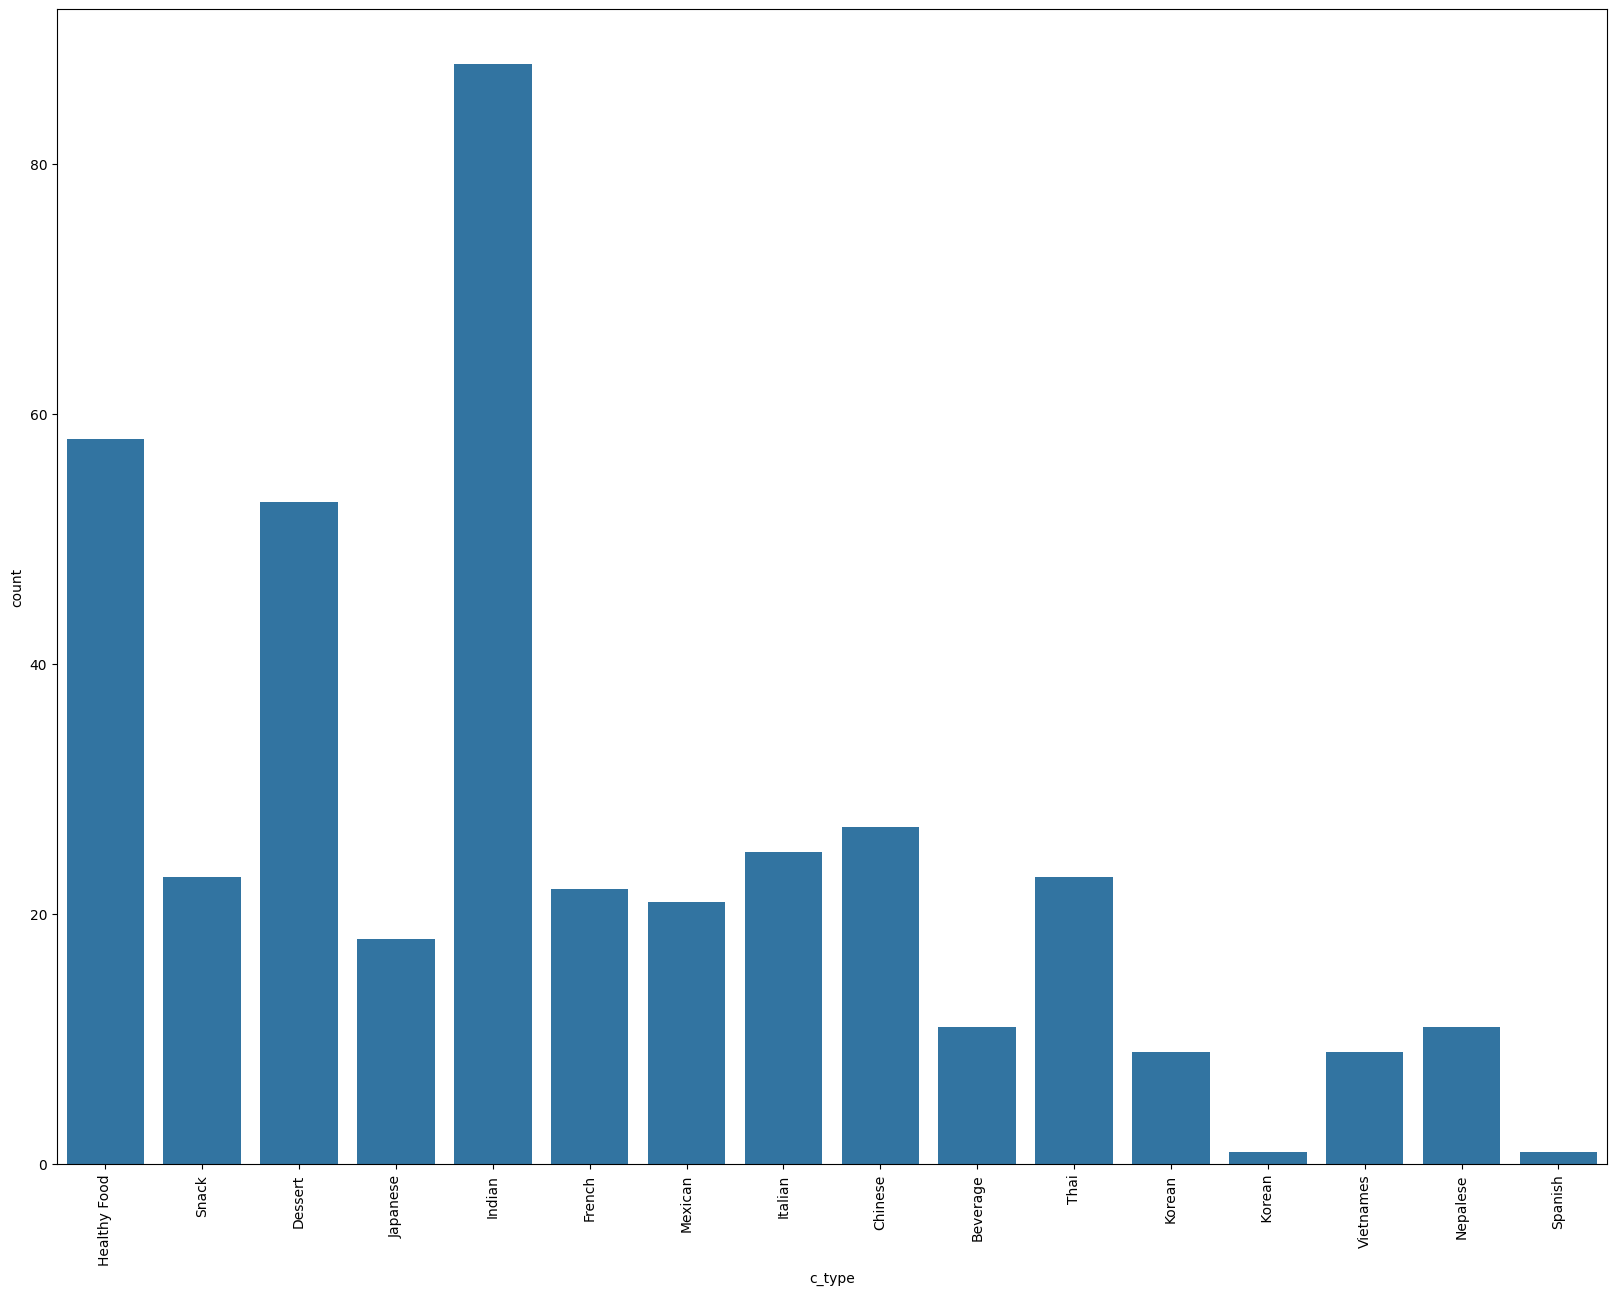

In [8]:
#Menghitung jumlah brand
print('Jumlah Type: ',len(data.c_type.unique()))

#Menghitung jumlah cellphone masing-masing brand
genre_counts = data['c_type'].value_counts()
print(genre_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(20, 15))
sns.countplot(data=data, x=data['c_type'])
plt.xticks(rotation=90)
plt.show()

Kode di atas digunakan untuk menganalisis kolom `c_type` dalam DataFrame `data` yang berisi kategori jenis makanan. Pertama, kode menghitung jumlah kategori unik dalam kolom tersebut dengan menggunakan `unique()` dan `len()`, lalu menampilkan hasilnya. Selanjutnya, menggunakan `value_counts()`, kode ini menghitung dan menampilkan jumlah kemunculan masing-masing kategori. Terakhir, kode ini memvisualisasikan distribusi kategori tersebut dalam bentuk grafik batang (bar plot) dengan `seaborn.countplot()`, yang memudahkan untuk melihat perbandingan jumlah masing-masing kategori, dengan label pada sumbu X diputar 90 derajat agar lebih mudah dibaca.

Jumlah Data:  2
veg_non
veg        238
non-veg    162
Name: count, dtype: int64


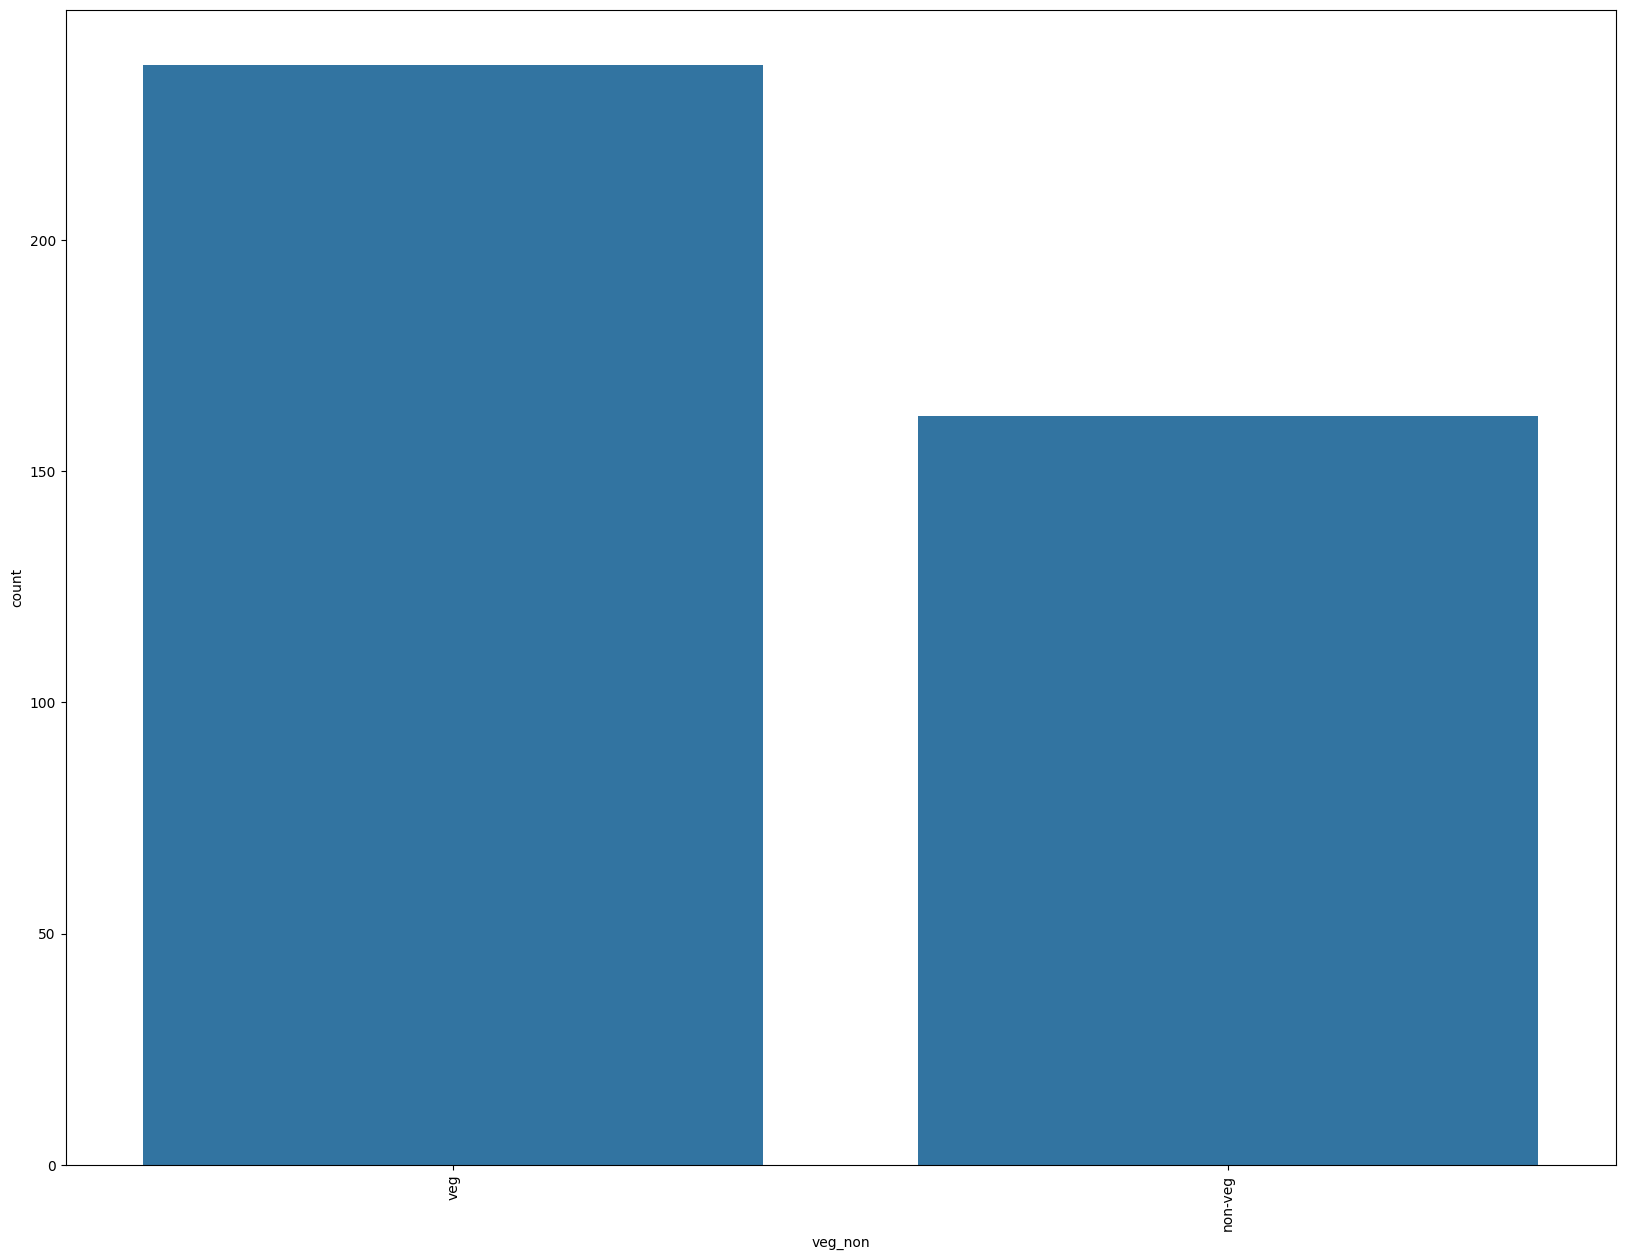

In [9]:
#Menghitung jumlah brand
print('Jumlah Data: ',len(data.veg_non.unique()))

#Menghitung jumlah cellphone masing-masing brand
genre_counts = data['veg_non'].value_counts()
print(genre_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(20, 15))
sns.countplot(data=data, x=data['veg_non'])
plt.xticks(rotation=90)
plt.show()

Kode ini pertama-tama menghitung jumlah kategori unik dalam kolom `veg_non`, lalu menghitung jumlah makanan yang termasuk dalam masing-masing kategori dengan menggunakan `value_counts()`. Selanjutnya, hasil distribusi jumlah kategori tersebut ditampilkan dalam bentuk grafik batang (bar plot), yang memvisualisasikan perbandingan jumlah makanan vegetarian dan non-vegetarian.


Jumlah kemunculan per rating:
 rating
1.0     48
2.0     47
3.0     63
4.0     53
5.0     61
6.0     48
7.0     49
8.0     39
9.0     42
10.0    61
Name: count, dtype: int64


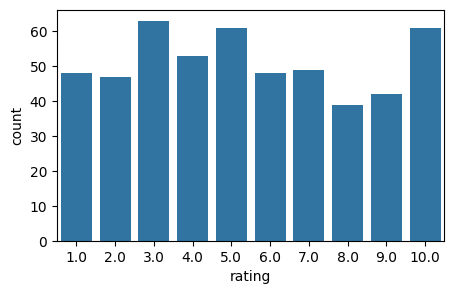

In [10]:
#Menghitung rating X muncul berapa kali
rating_counts = rating['rating'].value_counts()
print("\nJumlah kemunculan per rating:\n", rating_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=rating, x=rating['rating'])
plt.show()

Kode ini pertama-tama menghitung dan menampilkan jumlah kemunculan setiap nilai rating dalam kolom rating menggunakan `value_counts()`, kemudian mengurutkan hasilnya dengan `.sort_index()` untuk memudahkan pembacaan. Selanjutnya, kode ini menampilkan distribusi kemunculan rating dalam bentuk grafik batang, menggunakan `sns.countplot()`, yang memungkinkan kita untuk dengan mudah melihat berapa banyak pengguna yang memberikan rating tertentu pada data.

# 3. Data Preparation

Merupakan tahapan untuk mempersiapkan data sebelum dilakukannya pemodelan machine learning

In [11]:
# Menggabungkan dataset berdasarkan food_id
merged_data = pd.merge(rating, data, on='food_id', how='inner', suffixes=('_user', '_food'))



Kode ini menggabungkan dua DataFrame (`rating` dan `data`) berdasarkan kolom `food_id` dengan menggunakan **inner join**, yang hanya menyertakan baris yang memiliki `food_id` yang cocok di kedua DataFrame. Selain itu, untuk kolom yang memiliki nama yang sama (seperti `food_id`), kode ini menambahkan akhiran `'_user'` dan `'_food'` agar tidak terjadi konflik nama kolom.

In [12]:
# Informasi dataset hasil gabungan
print("Hasil penggabungan dataset:")
merged_data.head(10)


Hasil penggabungan dataset:


,user_id,food_id,rating,name,c_type,veg_non,describe
0,1.0,88.0,4.0,peri peri chicken satay,Snack,non-veg,"boneless skinless chicken thigh (trimmed), sal..."
1,1.0,46.0,3.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."
2,1.0,24.0,5.0,green lentil dessert fudge,Dessert,veg,"whole moong beans, cow ghee, raisins, whole mi..."
3,1.0,25.0,4.0,cashew nut cookies,Dessert,veg,"cashew paste, ghee, khaand (a sweetening agent..."
4,2.0,49.0,1.0,christmas tree pizza,Italian,veg,"pizza dough (2 boules), red pepper, red onion,..."
5,2.0,33.0,8.0,moong dal kiwi coconut soup,Indian,veg,"green gram (dhuli moong dal), kiwis, coconut c..."
6,2.0,106.0,9.0,chicken nimbu dhaniya shorba,Beverage,non-veg,"water, chicken (diced)), ginger garlic paste, ..."
7,2.0,71.0,8.0,carrot ginger soup,Healthy Food,veg,"Carrots, Olive Oil, Salt, Vegetable Stock, Gin..."
8,3.0,73.0,9.0,hot chocolate,Beverage,veg,"milk, chocolate, cocoa powder, powdered sugar,..."
9,3.0,110.0,10.0,chicken and mushroom lasagna,Italian,non-veg,"chicken, salt, crush black pepper, garlic clov..."


In [13]:
print("\nInformasi dataset hasil gabungan:")
print(merged_data.info())


Informasi dataset hasil gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   511 non-null    float64
 1   food_id   511 non-null    float64
 2   rating    511 non-null    float64
 3   name      511 non-null    object 
 4   c_type    511 non-null    object 
 5   veg_non   511 non-null    object 
 6   describe  511 non-null    object 
dtypes: float64(3), object(4)
memory usage: 28.1+ KB
None


In [14]:
# Mengubah nilai kolom menjadi lowercase
merged_data['name'] = merged_data['name'].str.lower()
merged_data['c_type'] = merged_data['c_type'].str.lower()
merged_data['describe'] = merged_data['describe'].str.lower()

Kode ini mengubah nilai dalam kolom `name`, `c_type`, dan `describe` pada DataFrame `merged_data` menjadi huruf kecil dengan menggunakan metode `.str.lower()`. Hal ini bertujuan untuk meningkatkan konsistensi data dan memudahkan analisis atau pencarian lebih lanjut tanpa memperhatikan perbedaan huruf besar/kecil.

### Data Cleaning

**Data Cleaning** adalah tahap krusial dalam pipeline machine learning, yang bertujuan memastikan data yang digunakan dalam pelatihan model bebas dari kesalahan, inkonsistensi, atau kekurangan. Ini mencakup menangani data yang hilang, mendeteksi dan memperbaiki outliers, mengatasi duplikasi, serta memastikan bahwa format dan tipe data sesuai. Data yang bersih memungkinkan model untuk belajar dari data yang representatif, yang pada akhirnya menghasilkan model yang lebih akurat dan dapat diandalkan.

In [15]:
#Cek missing value
merged_data.isnull().sum()

user_id     0
food_id     0
rating      0
name        0
c_type      0
veg_non     0
describe    0
dtype: int64

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Menghapus nilai null
merged_data = merged_data.dropna()


In [17]:
# Cek missing value
print("\nJumlah missing value pada dataset:")
print(merged_data.isnull().sum())




Jumlah missing value pada dataset:
user_id     0
food_id     0
rating      0
name        0
c_type      0
veg_non     0
describe    0
dtype: int64


In [18]:
# Menghapus duplikat berdasarkan food_id
cleaned_data = merged_data.drop_duplicates('food_id')


In [19]:
# Membuat DataFrame untuk digunakan
foods = pd.DataFrame({
    'food_id': cleaned_data['food_id'].tolist(),
    'name': cleaned_data['name'].tolist(),
    'c_type': cleaned_data['c_type'].tolist(),
    'veg_non': cleaned_data['veg_non'].tolist(),
    'describe': cleaned_data['describe'].tolist(),
})

##  TF IDF Vectorizer

**TF-IDF Vectorizer** adalah alat yang digunakan untuk mengubah teks menjadi representasi numerik berdasarkan seberapa sering kata muncul dalam teks (TF) dan seberapa penting kata tersebut dibandingkan dengan seluruh koleksi teks (IDF). Pada kode yang diberikan, TF-IDF digunakan untuk menganalisis kolom **`describe`** dalam DataFrame `foods`, mengubah deskripsi makanan menjadi bentuk yang dapat diproses lebih lanjut oleh model machine learning, serta memberikan gambaran tentang kata-kata penting dalam deskripsi makanan berdasarkan konteks seluruh dataset.

In [20]:
# TF-IDF Vectorizer untuk kolom Describe
tf = TfidfVectorizer(stop_words='english')  # Menghapus kata umum dalam bahasa Inggris
tfidf_matrix = tf.fit_transform(foods['describe'])


In [21]:
# Mapping array dari fitur index integer ke fitur nama
feature_names = tf.get_feature_names_out()  # Mendapatkan nama fitur (kata-kata unik)
print("Fitur unik dari kolom 'describe':")
print(feature_names, "\n")

Fitur unik dari kolom 'describe':
['10' '13' '150' ... 'zested' 'zinfandel' 'zucchini'] 



In [22]:
# Menampilkan Matriks TF-IDF dalam bentuk DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),  # Konversi sparse matrix ke dense matrix
    columns=feature_names,  # Kolom berdasarkan kata-kata unik
    index=foods['name']  # Nama makanan sebagai indeks
)

In [23]:
# Menampilkan matriks TF-IDF untuk 5 baris acak
print("\nMatriks TF-IDF untuk beberapa makanan (random 5 baris):")
print(tfidf_df.sample(5), "\n")


Matriks TF-IDF untuk beberapa makanan (random 5 baris):
                                       10   13  150  15th   20   25  300  3cm  \
name                                                                            
broccoli souffle                      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
chicken and mushroom lasagna          0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
fennel scented sweet banana fritters  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
pesto fish kebabs                     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
deviled scotch egg                    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   

                                       50  aamchoor  ...  yoks  yolk  yolks  \
name                                                 ...                      
broccoli souffle                      0.0       0.0  ...   0.0   0.0    0.0   
chicken and mushroom lasagna          0.0       0.0  ...   0.0   0.0    0.0   
fennel scented sweet banana fritters  0.0       0.0  ...   

## Cosine Similarity

**Cosine Similarity** pada kode tersebut digunakan untuk menghitung tingkat kesamaan antara deskripsi makanan berdasarkan representasi TF-IDF mereka. Matriks yang dihasilkan menunjukkan seberapa mirip setiap makanan satu sama lain berdasarkan deskripsi yang ada. Matriks ini sangat berguna untuk aplikasi seperti sistem rekomendasi, di mana kita bisa menyarankan makanan yang mirip dengan makanan yang telah dipilih pengguna, atau untuk analisis teks lainnya yang membutuhkan pemahaman tentang kesamaan antara dokumen.

In [24]:
# Menghitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)



In [25]:
# Membuat DataFrame dari matriks cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=foods['name'], columns=foods['name'])

print("\n=== Contoh Cosine Similarity Matrix ===")
print(cosine_sim_df.head())


=== Contoh Cosine Similarity Matrix ===
name                        peri peri chicken satay  steam bunny chicken bao  \
name                                                                           
peri peri chicken satay                    1.000000                 0.086751   
steam bunny chicken bao                    0.086751                 1.000000   
green lentil dessert fudge                 0.000000                 0.000000   
cashew nut cookies                         0.055632                 0.089359   
christmas tree pizza                       0.017025                 0.005378   

name                        green lentil dessert fudge  cashew nut cookies  \
name                                                                         
peri peri chicken satay                         0.0000            0.055632   
steam bunny chicken bao                         0.0000            0.089359   
green lentil dessert fudge                      1.0000            0.133500   
cashew n

In [26]:
# print("=== Cosine Similarity Matrix ===")
print(cosine_sim_df.head(), "\n")


name                        peri peri chicken satay  steam bunny chicken bao  \
name                                                                           
peri peri chicken satay                    1.000000                 0.086751   
steam bunny chicken bao                    0.086751                 1.000000   
green lentil dessert fudge                 0.000000                 0.000000   
cashew nut cookies                         0.055632                 0.089359   
christmas tree pizza                       0.017025                 0.005378   

name                        green lentil dessert fudge  cashew nut cookies  \
name                                                                         
peri peri chicken satay                         0.0000            0.055632   
steam bunny chicken bao                         0.0000            0.089359   
green lentil dessert fudge                      1.0000            0.133500   
cashew nut cookies                              0

In [27]:
# Melihat similarity matrix pada setiap genre atau nama
print(cosine_sim_df.sample(3, axis=1).sample(3, axis=0), "\n")

name                                     christmas tree pizza  \
name                                                            
baked namakpara with roasted almond dip              0.081027   
dahi lasooni chicken                                 0.010432   
chicken in mahalak sauce                             0.049412   

name                                     risotto lobster with parmesan egg pancake, confit tomatoes and coral tuille  \
name                                                                                                                   
baked namakpara with roasted almond dip                                           0.185611                             
dahi lasooni chicken                                                              0.094301                             
chicken in mahalak sauce                                                          0.131449                             

name                                     gluten free almond cake  
name  

# 4. Modelling Content Based Filtering dan Collaborative Filtering

## 4.1 Modelling Content Based Filtering (CBF)

In [28]:
def food_recommendations(input_value, similarity_data=cosine_sim_df, items=foods[['name', 'c_type', 'veg_non']], k=4):
    input_value = input_value.strip().lower()  # Pastikan input dalam lowercase dan tanpa spasi ekstra

    print(f"Input value: {input_value}")  # Debugging: Periksa input_value

    # Jika input_value ada sebagai nama makanan dalam similarity_data (pencocokan parsial)
    matching_items = [name for name in similarity_data.columns if input_value in name.lower()]
    
    if matching_items:
        print(f"Nama makanan yang cocok dengan '{input_value}': {matching_items}")  # Debugging
        # Rekomendasi berdasarkan nama makanan
        closest = matching_items  # Gunakan semua makanan yang cocok
        closest_df = pd.DataFrame({'name': closest})  # Buat DataFrame dengan kolom 'name'
        return closest_df.merge(items, on='name').head(k)
    
    # Jika input_value adalah C_Type yang ada dalam dataset (menggunakan pencocokan parsial)
    elif any(input_value in ctype.lower() for ctype in items['c_type'].unique()):
        # Filter dataset berdasarkan C_Type yang mengandung input_value
        filtered_items = items[items['c_type'].str.contains(input_value, case=False, na=False)]
        return filtered_items.head(k)
    
    else:
        # Jika input_value tidak ditemukan
        available_names = ", ".join(items['name'].unique()[:5])  # Tampilkan 5 nama makanan
        available_types = ", ".join(items['c_type'].unique()[:5])  # Tampilkan 5 jenis makanan
        return (f"Tidak ada rekomendasi yang ditemukan untuk '{input_value}'.\n"
                f"Coba masukkan salah satu nama berikut: {available_names}, atau salah satu jenis makanan berikut: {available_types}")


Fungsi **`food_recommendations`** memberikan rekomendasi makanan berdasarkan input pengguna. Jika pengguna memasukkan nama makanan, fungsi mencari makanan yang namanya mirip. Jika tidak ada, fungsi akan mencari berdasarkan jenis makanan (misalnya, "healthy food"). Jika input tidak cocok dengan nama atau jenis makanan apapun, fungsi memberikan daftar beberapa makanan atau jenis makanan yang tersedia sebagai alternatif. Hanya `k` rekomendasi teratas yang ditampilkan.

### 4.1.1 Penggunaan Content Based Filtering (CBF)

In [29]:
print("\nSelamat datang di sistem rekomendasi makanan!")

# Meminta input jumlah pencarian yang diinginkan
while True:
    try:
        total_searches = int(input("Masukkan jumlah pencarian yang Anda inginkan: ").strip())
        if total_searches > 0:
            break  # Keluar dari loop jika input valid
        else:
            print("Jumlah pencarian harus lebih besar dari 0. Coba lagi.")
    except ValueError:
        print("Input tidak valid. Masukkan angka yang valid.")

# Melakukan pencarian sebanyak total_searches
for _ in range(total_searches):
    # Meminta input nama makanan atau jenis makanan
    input_value = input("\nMasukkan nama makanan atau jenis makanan yang Anda suka: ").strip()

    # Mendapatkan hasil rekomendasi berdasarkan input dan jumlah yang diinginkan (default k=10)
    result = food_recommendations(input_value, k=10)

    # Menampilkan hasil rekomendasi
    print("\n=== Hasil Rekomendasi ===")
    if isinstance(result, pd.DataFrame):  # Jika hasil adalah DataFrame
        print(result.to_string(index=False, justify='left'))  # Tampilkan dengan format rata kiri
    else:
        print(result)  # Jika hasil adalah string (pesan error)

print("\nTerima kasih telah menggunakan sistem rekomendasi makanan!")



Selamat datang di sistem rekomendasi makanan!
Input value: thai
Nama makanan yang cocok dengan 'thai': ['thai lamb balls', 'thai pineapple rice', 'thai prawn curry & baked rice ', 'thai style chicken tikka', 'thai fish curry']

=== Hasil Rekomendasi ===
name                           c_type veg_non
               thai lamb balls thai   non-veg
           thai pineapple rice thai       veg
thai prawn curry & baked rice  thai       veg
      thai style chicken tikka thai   non-veg
               thai fish curry thai   non-veg
Input value: pizza
Nama makanan yang cocok dengan 'pizza': ['christmas tree pizza', 'mexican pizza', 'filo pizza', 'kuttu atta pizza', 'meat lovers pizza', 'tricolour pizza']

=== Hasil Rekomendasi ===
name                 c_type  veg_non
christmas tree pizza italian     veg
       mexican pizza mexican     veg
          filo pizza italian     veg
    kuttu atta pizza italian     veg
   meat lovers pizza italian non-veg
     tricolour pizza italian     veg

Terima 

Program ini mengizinkan pengguna untuk melakukan pencarian beberapa kali dan mendapatkan rekomendasi makanan berdasarkan input yang diberikan. Input yang tidak valid akan terus diproses ulang hingga benar. Setelah pencarian selesai, hasilnya ditampilkan dalam format yang mudah dibaca.

## 4.2 Modelling Collaborative Filtering

In [30]:
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

In [31]:
# Membaca dataset
df = rating
df

,user_id,food_id,rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0
...,...,...,...
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0


### 4.2.1 Preprocessing Dataset

**Preprocessing Dataset**:
Di bagian ini, dataset `rating` dipersiapkan untuk digunakan dalam model. Data yang hilang dihapus dengan fungsi `.dropna()`, dan kolom-kolomnya diubah menjadi huruf kecil menggunakan `.str.lower()`. Selanjutnya, ID pengguna dan ID makanan dikodekan menjadi angka dengan menggunakan fungsi `map()` untuk memetakan setiap ID ke nilai numerik yang unik, yang memungkinkan model untuk memahami input dalam bentuk numerik.

In [32]:
#Cek missing value
df.isnull().sum()


user_id    1
food_id    1
rating     1
dtype: int64

In [33]:
# Menghapus nilai null
df = df.dropna()


In [34]:
# Cek missing value
print("\nJumlah missing value pada dataset:")
df.isnull().sum()


Jumlah missing value pada dataset:


user_id    0
food_id    0
rating     0
dtype: int64

In [35]:
# Encoding user_id dan food_id
user_ids = df['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

food_ids = df['food_id'].unique().tolist()
food_to_food_encoded = {x: i for i, x in enumerate(food_ids)}
food_encoded_to_food = {i: x for i, x in enumerate(food_ids)}

df['user'] = df['user_id'].map(user_to_user_encoded)
df['food'] = df['food_id'].map(food_to_food_encoded)


/tmp/ipykernel_89093/2605581458.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user_id'].map(user_to_user_encoded)
/tmp/ipykernel_89093/2605581458.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['food'] = df['food_id'].map(food_to_food_encoded)


### 4.2.2 Statistik Dataset

**Statistik Dataset**:
Pada bagian ini, dilakukan perhitungan dasar tentang dataset, termasuk jumlah pengguna (`num_users`), jumlah makanan (`num_food`), serta nilai rating terendah dan tertinggi (`min_rating`, `max_rating`). Statistik ini memberikan gambaran umum tentang ukuran dan rentang rating dalam dataset yang akan digunakan untuk pelatihan model.

In [36]:
# Statistik dataset
num_users = len(user_to_user_encoded)
num_food = len(food_to_food_encoded)
df['rating'] = df['rating'].values.astype(np.float32)
min_rating, max_rating = df['rating'].min(), df['rating'].max()

print(f'Number of Users: {num_users}, Number of Foods: {num_food}, '
      f'Min Rating: {min_rating}, Max Rating: {max_rating}')


Number of Users: 100, Number of Foods: 309, Min Rating: 1.0, Max Rating: 10.0


/tmp/ipykernel_89093/1220126829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].values.astype(np.float32)


### 4.2.3 Split Data

**Pembagian Data**:
Di sini, dataset diacak dengan fungsi `.sample()` untuk memastikan bahwa model tidak akan terpapar pada urutan data yang spesifik. Data kemudian dibagi menjadi dua bagian: 80% untuk data latih dan 20% untuk data validasi. Selain itu, rating dinormalisasi ke dalam rentang [0, 1] agar lebih mudah diproses oleh model, dengan menggunakan rumus normalisasi `(x - min_rating) / (max_rating - min_rating)`.


In [37]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,food_id,rating,user,food
124,24.0,51.0,5.0,23,67
84,16.0,243.0,3.0,15,78
433,83.0,79.0,1.0,82,282
255,49.0,77.0,10.0,48,191
68,13.0,74.0,8.0,12,64
...,...,...,...,...,...
106,19.0,84.0,10.0,18,97
270,51.0,151.0,10.0,50,200
348,67.0,146.0,7.0,66,209
435,84.0,253.0,8.0,83,283


In [38]:
# Split dataset
df = df.sample(frac=1, random_state=42)  # Mengacak dataset
x = df[['user', 'food']].values
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values  # Normalisasi rating


In [39]:
# Membagi data menjadi data latih (80%) dan validasi (20%)
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices], x[train_indices:], y[:train_indices], y[train_indices:]
)


### 4.2.4 Modelling

Model rekomendasi RecommenderNet dibangun dengan arsitektur neural network yang menggunakan embedding layers untuk pengguna dan makanan, yang memetakan ID ke dalam ruang vektor berdimensi rendah, memungkinkan model menangkap hubungan antara keduanya. Model ini juga menggunakan bias layers untuk menangkap efek bias dari pengguna dan makanan, serta aktivasi sigmoid pada output untuk memprediksi rating dalam rentang [0, 1]. Model kemudian dikompilasi dengan loss function **BinaryCrossentropy** dan optimizer **Adam** untuk mengoptimalkan bobot model. **EarlyStopping** diterapkan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik **RMSE** pada data validasi, mencegah overfitting dan menghemat waktu pelatihan.

In [40]:
# Membuat Model RecommenderNet
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_food, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size, embeddings_initializer="he_normal",
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.food_embedding = layers.Embedding(
            num_food, embedding_size, embeddings_initializer="he_normal",
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.food_bias = layers.Embedding(num_food, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])
        dot_product = tf.tensordot(user_vector, food_vector, axes=2)
        x = dot_product + user_bias + food_bias
        return tf.nn.sigmoid(x)

In [41]:
model = RecommenderNet(num_users, num_food)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


I0000 00:00:1731781084.689881   89093 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2281 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [42]:

# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)
    

Epoch 1/100


I0000 00:00:1731781085.722996   90112 service.cc:148] XLA service 0x7715c8004860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731781085.723013   90112 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-17 01:18:05.741440: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731781085.807733   90112 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6927 - root_mean_squared_error: 0.3248

I0000 00:00:1731781086.081741   90112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6958 - root_mean_squared_error: 0.3200 - val_loss: 0.6915 - val_root_mean_squared_error: 0.3226
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.6957 - root_mean_squared_error: 0.3156 - val_loss: 0.6917 - val_root_mean_squared_error: 0.3227
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.6835 - root_mean_squared_error: 0.2950 - val_loss: 0.6914 - val_root_mean_squared_error: 0.3225
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.6831 - root_mean_squared_error: 0.3091 - val_loss: 0.6909 - val_root_mean_squared_error: 0.3221
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.6768 - root_mean_squared_error: 0.2976 - val_loss: 0.6907 - val_root_mean_squared_error: 0.3220
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.6761 - root_mean_squared_error: 0.2952 - val_loss: 0.6912 - val_root_mean_squared_error: 0.3223
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

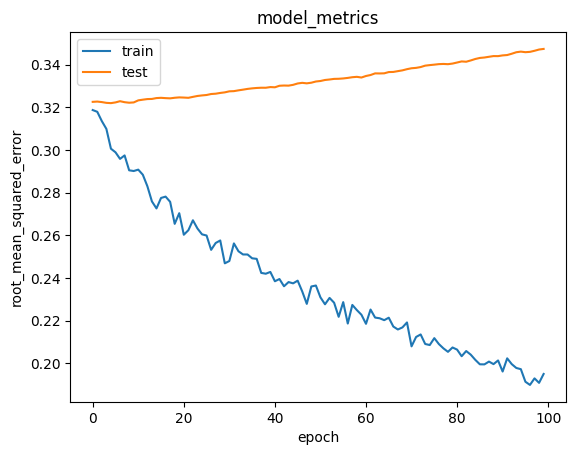

In [43]:

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.2.5 Penerapan collaborative filtering

In [51]:
import numpy as np

# 5. Menampilkan rekomendasi makanan untuk pengguna

# Mengambil sample user secara acak
user_id = df.user_id.sample(1).iloc[0]
food_visited_by_user = df[df.user_id == user_id]

# Menampilkan rekomendasi berdasarkan rating tinggi dari user
print(f'\nShowing recommendations for user: {user_id}')
print("===========================")

# Menampilkan makanan dengan rating tinggi dari user
# Kita anggap rating lebih besar dari 4.0 dianggap rating tinggi
high_rated_food = food_visited_by_user[food_visited_by_user['rating'] > 4.0]

print("Foods with high ratings from user:")
if not high_rated_food.empty:
    for row in high_rated_food.itertuples():
        # Mengambil nama makanan dan jenis makanan berdasarkan food_id
        food_name = data[data['food_id'] == row.food_id].iloc[0]['name']
        food_type = data[data['food_id'] == row.food_id].iloc[0]['c_type']
        print(f'Food: {food_name}, Type: {food_type}, Rating: {row.rating}')
else:
    print("No high-rated food found for this user.")

# Operator bitwise (~) untuk menemukan makanan yang belum dikunjungi oleh pengguna
food_not_visited = data[~data['food_id'].isin(food_visited_by_user.food_id.values)]['food_id']
food_not_visited = list(
    set(food_not_visited)
    .intersection(set(food_to_food_encoded.keys()))
)

# Menyusun array input untuk model untuk makanan yang belum dikunjungi
food_not_visited = [[food_to_food_encoded.get(x)] for x in food_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_food_array = np.hstack(
    ([[user_encoder]] * len(food_not_visited), food_not_visited)
)

# Prediksi rating untuk setiap food yang belum dikunjungi oleh user
ratings = model.predict(user_food_array).flatten()

# Menemukan makanan dengan rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_food_ids = [
    food_encoded_to_food.get(food_not_visited[x][0]) for x in top_ratings_indices
]

# Menampilkan rekomendasi makanan yang belum dikunjungi
print('\nTop 10 recommended foods for user:')
for food_id in recommended_food_ids:
    # Mengambil nama makanan dan jenis makanan berdasarkan food_id
    food_name = data[data['food_id'] == food_id].iloc[0]['name']
    food_type = data[data['food_id'] == food_id].iloc[0]['c_type']
    print(f'Food: {food_name}, Type: {food_type}')

# Menampilkan rekomendasi selanjutnya untuk pengguna
print("\nNext recommended food for the user:")
# Mengambil 1 makanan dengan rating tertinggi setelah prediksi
next_food_id = recommended_food_ids[0]  # Mengambil ID makanan dengan rating tertinggi
next_food = data[data['food_id'] == next_food_id]

for row in next_food.itertuples():
    food_name = row.name  # Mengambil nama makanan langsung dari data
    food_type = row.c_type  # Mengambil jenis makanan langsung dari data
    print(f'Food: {food_name}, Type: {food_type}')



Showing recommendations for user: 22.0
Foods with high ratings from user:
Food: cajun spiced turkey wrapped with bacon, Type: Mexican, Rating: 6.0
Food: chicken minced salad, Type: Healthy Food, Rating: 5.0
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step

Top 10 recommended foods for user:
Food: chicken quinoa biryani, Type: Healthy Food
Food: fruit cube salad, Type: Healthy Food
Food: corn & jalapeno poppers, Type: Mexican
Food: mixed beans salad, Type: Healthy Food
Food: white chocolate and lemon pastry, Type: Dessert
Food: chicken tikka, Type: Indian
Food: apple and pear cake, Type: Healthy Food
Food: filter coffee, Type: Beverage
Food: spinach & banana pancakes, Type: Healthy Food
Food: amritsari fish, Type: Indian

Next recommended food for the user:
Food: chicken quinoa biryani, Type: Healthy Food


Di bagian ini, model digunakan untuk memberikan rekomendasi makanan kepada seorang pengguna yang dipilih secara acak. Makanan yang telah dikunjungi oleh pengguna tersebut disaring, dan model memprediksi rating untuk makanan yang belum dikunjungi. Rating yang diprediksi dikembalikan ke rentang asli dan makanan dengan rating tertinggi dipilih sebagai rekomendasi. Kemudian, nama dan kategori makanan ditampilkan untuk memberikan rekomendasi yang mudah dipahami.

In [ ]:
https://github.com/sellyrk/Project-Report-of-System-Recommendation